<a href="https://colab.research.google.com/github/EnigmaK9/ds-fp/blob/main/final_project_second_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Proyecto del módulo dos del Máster en Data Science de Dev.F 


# Importamos bibliotecas necesarias:
---

In [ ]:
import numpy as np 
import pandas as pd 
from datetime import datetime


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
!pip install pycountry
import folium 
from folium import plugins


import numpy as np
from PIL import Image


import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5


# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---
# Leemos el CSV 
---

In [ ]:

df = pd.read_csv('/content/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


---
# Creamos una copia del DataFrame
---

In [ ]:
# Creating a copy of the original dataframe- df
df1 = df.copy()
df1.drop('S.NO',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB




---

# Convertimos cadena a datetime64.
# Configuramos la columna fecha como la columna índice.
# Convertimos el deporte a letras mayúsculas.
# DF es el dataframe original donde df1 es una copia que se coloca la fecha como la columna índice.
---



In [ ]:
# Convert string to datetime64
df1['Year'] = df1['Year'].apply(pd.to_datetime,format='%Y')

# Set Date column as the index column.
df1['year'] = pd.DatetimeIndex(df1['Year']).year  
df1.set_index('year', inplace=True)
df1.drop('Year',axis=1,inplace=True)

# Converting the sport column to uppercase
df1['Sport'] = df1['Sport'].str.upper()
df1.head()

# df is the original dataframe while df1 is a copy where the Date has been set as an index column

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0


---
# 1. Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020. ⬆
---

In [ ]:
##1.Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.
"""ranking_athletes = df1[(df1.index >= 2010)]
ranking_athletes_1 = ranking_athletes[ranking_athletes['Current Rank']-2 & 
                                      ranking_athletes['Current Rank']>=0].sort_values(by='year',ascending=True)

rank_athletes_2010_2020 = ranking_athletes_1[['Current Rank','Name','Sport','Nationality','earnings ($ million)']]

rank_athletes_2010_2020.head()"""

data_2010_2020 = df1[df1.index >= 2010]
deportistas = list(set(data_2010_2020['Name']))
deportista_sube_dos_lugares=[]


for d in deportistas:
  deportista = data_2010_2020[data_2010_2020['Name']==d]
  rank = deportista['Current Rank']
  if sum(rank[rank > int(rank.head(1))+1]):
    deportista_sube_dos_lugares.append(d)

print(deportista_sube_dos_lugares)


['Phil Mickelson', 'Cristiano Ronaldo', 'Tiger Woods', 'Kobe Bryant', 'Kevin Durant', 'David Beckham']


## $\color{green}{\text{Tiger Woods, Cristiano Ronaldo, David Beckham, Phil Mickelson, Kevin Durant y Kobe Briant}}$



---


#2. Atleta con el menor número de apariciones y mayores ganancias. 💸

---





In [ ]:
##2.Atleta con el menor número de apariciones y mayores ganancias.
athletes = pd.DataFrame(df1['Name'].value_counts(ascending=True))
athletes.to_csv('athletes_less_apariciones.csv')

In [ ]:
athletes_less_appearances = pd.read_csv('/content/athletes_less_apariciones (1).csv')
athletes_less_appearances

,Name,No.Apariciones
0,Jeff Gordon,1
1,Sergei Federov,1
2,Gary Sheffield,1
3,Kirk Cousins,1
4,Michael Vick,1
5,Lance Armstrong,1
6,Muhammad Ali,1
7,Tom Brady,1
8,Dale Earnhardt Jr.,1
9,Eli Manning,1


In [ ]:
athletes_less_appearances = pd.merge(athletes_less_appearances,df1)
athletes_less_appearances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  38 non-null     object 
 1   No.Apariciones        38 non-null     int64  
 2   Nationality           38 non-null     object 
 3   Current Rank          38 non-null     int64  
 4   Previous Year Rank    31 non-null     object 
 5   Sport                 38 non-null     object 
 6   earnings ($ million)  38 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.4+ KB


In [ ]:
trace = go.Bar(
                    y = athletes_less_appearances['earnings ($ million)'],
                    x = athletes_less_appearances['Name'],
                    orientation='v',
                    marker = dict(color='bisque',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Athlete with the fewest appearances and highest earnings',width=800, height=500, 
                       xaxis= dict(title='Athlete´s name'),
                       yaxis=dict(title='earnings ($ million)'),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


## $\color{green}{\text{Connor McGregor con 99 Millones}}$


#3.Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.


In [ ]:
##3.Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.
no_rank_total = df1[df1['Previous Year Rank'].isna()]
no_rank_total


,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0
1990,Jack Nicklaus,USA,6,NaN,GOLF,8.6
1990,Greg Norman,Australia,7,NaN,GOLF,8.5
1990,Michael Jordan,USA,8,NaN,BASKETBALL,8.1
1990,Arnold Palmer,USA,8,NaN,GOLF,8.1


In [ ]:
no_rank_country = no_rank_total.sort_values(by='Nationality', ascending=False)
no_rank_sport = no_rank_total.sort_values(by='Sport', ascending=False)
no_rank = pd.merge(no_rank_country,no_rank_sport)
no_rank_athletes = no_rank[['Nationality','Sport','earnings ($ million)']]
no_rank_athletes

,Nationality,Sport,earnings ($ million)
0,USA,BOXING,28.6
1,USA,GOLF,18.1
2,USA,BOXING,18.5
3,USA,BASKETBALL,21.6
4,USA,NASCAR,24.1
5,USA,GOLF,26.8
6,USA,BOXING,26.0
7,USA,BASEBALL,17.2
8,USA,BASKETBALL,69.0
9,USA,BOXING,8.1


In [ ]:
##Sport
trace = go.Bar(
                    y = no_rank_athletes['earnings ($ million)'],
                    x = no_rank_athletes['Sport'],
                    orientation='v',
                    marker = dict(color='bisque',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Sport with the most wealthy and unranked athletes',width=500, height=500, 
                       xaxis= dict(title='Sport'),
                       yaxis=dict(title='earnings ($ million)'),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## $\color{green}{\text{Basketball and USA}}$

In [ ]:
##Country
trace = go.Bar(
                    y = no_rank_athletes['earnings ($ million)'],
                    x = no_rank_athletes['Nationality'],
                    orientation='v',
                    marker = dict(color='aquamarine',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country with the wealthiest unranked athletes',width=500, height=500, 
                       xaxis= dict(title='Country'),
                       yaxis=dict(title='earnings ($ million)'),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

---
#País con mayor número de deportes con atletas en el dataset.
---

In [ ]:
## 4. País con mayor número de deportes con atletas en el dataset.
most_athletes_per_sport = df1['Nationality'].value_counts()
most_athletes_per_sport.to_csv('most_athletes_per_sport.csv')

In [ ]:
athletes_per_sport = pd.read_csv('/content/most_athletes_per_sport.csv')
athletes_per_sport

,Nationality,No. Athletes
0,USA,206
1,UK,13
2,Germany,13
3,Switzerland,12
4,Portugal,10
5,Brazil,9
6,Argentina,9
7,Canada,6
8,Italy,4
9,Finland,3


In [ ]:
trace = go.Bar(
                    y = athletes_per_sport['No. Athletes'],
                    x = athletes_per_sport['Nationality'],
                    orientation='v',
                    marker = dict(color='coral',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country with the most number of athletes',width=500, height=500, 
                       xaxis= dict(title='Country'),
                       yaxis=dict(title='No. Athletes'),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

---
# 5. ¿Cuántos atletas por deporte tiene cada país? 
---

In [ ]:
##5.¿Cuántos atletas por deporte tiene cada país?
count_by_country = df1.groupby(["Nationality","Sport"]).size().reset_index(name = "count_by_country")
count_by_country
##aquí falata hacer gráfico, quiero hacer de columnas apiladas pero no se cómo

,Nationality,Sport,count_by_country
0,Argentina,SOCCER,9
1,Australia,GOLF,1
2,Austria,AUTO RACING,1
3,Brazil,AUTO RACING,4
4,Brazil,SOCCER,5
5,Canada,AUTO RACING,2
6,Canada,BOXING,1
7,Canada,HOCKEY,1
8,Canada,ICE HOCKEY,2
9,Dominican,BASEBALL,1


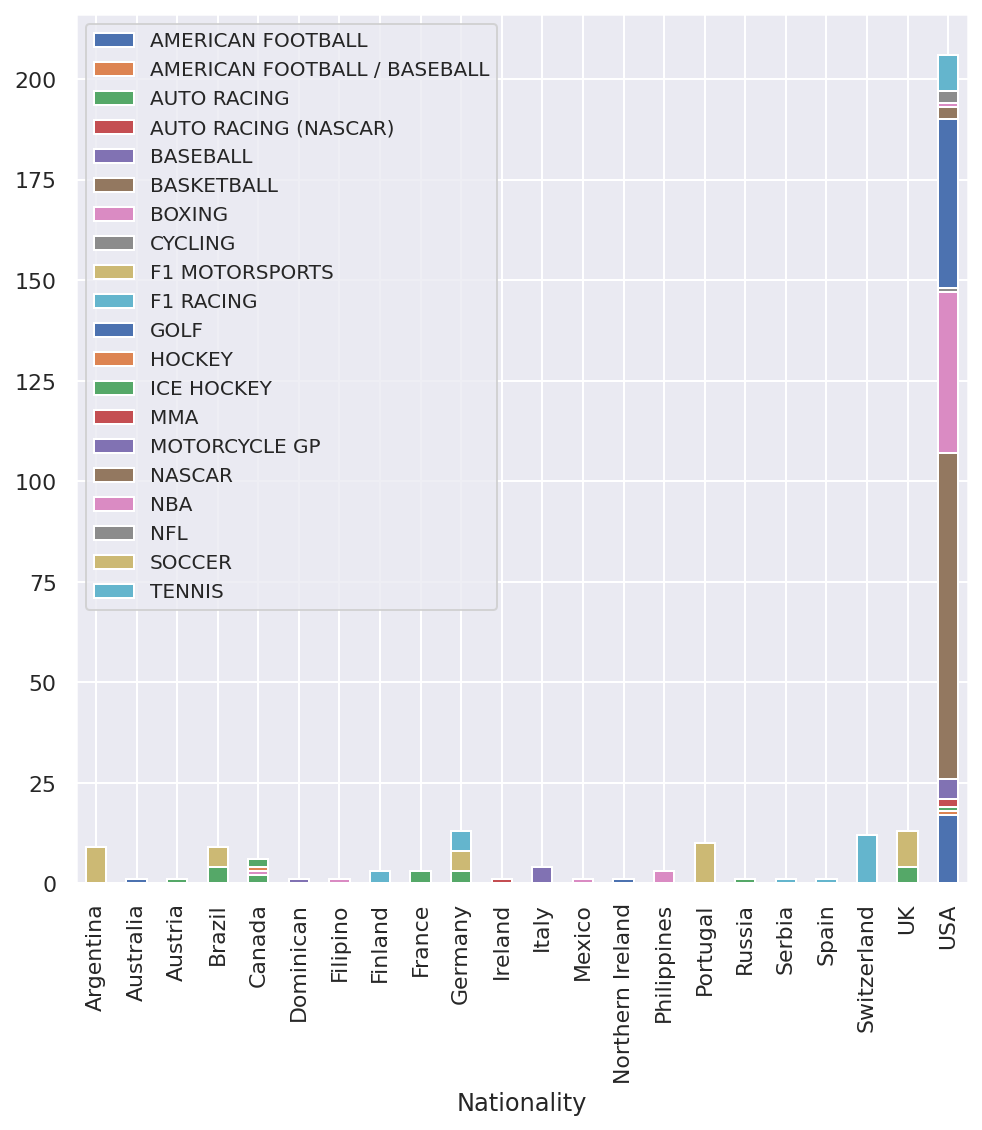

In [ ]:
count_by_country_graph = count_by_country.pivot_table(index=['Nationality'], 
                                                      columns='Sport', values='count_by_country').rename_axis(None, axis = 1)
axes = count_by_country_graph.plot.bar(rot=90, stacked=True, figsize=(8,8)) 
axes.legend(loc=2, fontsize = 10)

---
# 6. Ganancia mínima y máxima (dentro del conjunto de datos) por deporte y por país. 💰
---

In [ ]:
##6.Ganancia mínima y máxima (dentro del dataset) por deporte y por país.
earn_by_country = df1.sort_values(by='earnings ($ million)',ascending=True)

In [ ]:
##Ganancia máxima por deporte y por país
earn_by_country_1 = earn_by_country[['Sport','Nationality','earnings ($ million)']]
earn_by_country_max = earn_by_country_1.groupby(["Nationality","Sport"]).max()
earn_by_country_max

earnings ($ million)
Nationality      Sport                                             
Argentina        SOCCER                                       127.0
Australia        GOLF                                           8.5
Austria          AUTO RACING                                   13.5
Brazil           AUTO RACING                                   22.0
                 SOCCER                                       105.0
Canada           AUTO RACING                                   23.0
                 BOXING                                        10.2
                 HOCKEY                                        17.9
                 ICE HOCKEY                                    14.5
Dominican        BASEBALL                                      35.0
Filipino         BOXING                                        62.0
Finland          F1 RACING                                     45.0
France           AUTO RACING                                   16.0
Germany          AUTO RACING                                   59.0
                 F1 MOTORSPORTS                                75.0
                 F1 RACING                                     80.0
Ireland          MMA                                           99.0
Italy            MOTORCYCLE GP                                 35.0
Mexico           BOXING                                        94.0
Northern Ireland GOLF                                          50.0
Philippines      BOXING                                       160.0
Portugal         SOCCER                                       109.0
Russia           ICE HOCKEY                                    29.8
Serbia           TENNIS                                        55.8
Spain            TENNIS                                        44.5
Switzerland      TENNIS                                       106.3
UK               AUTO RACING                                   46.0
                 SOCCER                                        50.0
USA              AMERICAN FOOTBALL                             89.5
                 AMERICAN FOOTBALL / BASEBALL                  22.5
                 AUTO RACING                                   26.5
                 AUTO RACING (NASCAR)                          24.5
                 BASEBALL                                      29.0
                 BASKETBALL                                    89.0
                 BOXING                                       300.0
                 CYCLING                                       28.0
                 GOLF                                         115.0
                 NASCAR                                        34.0
                 NBA                                           15.2
                 NFL                                           16.5
                 TENNIS                                        28.2

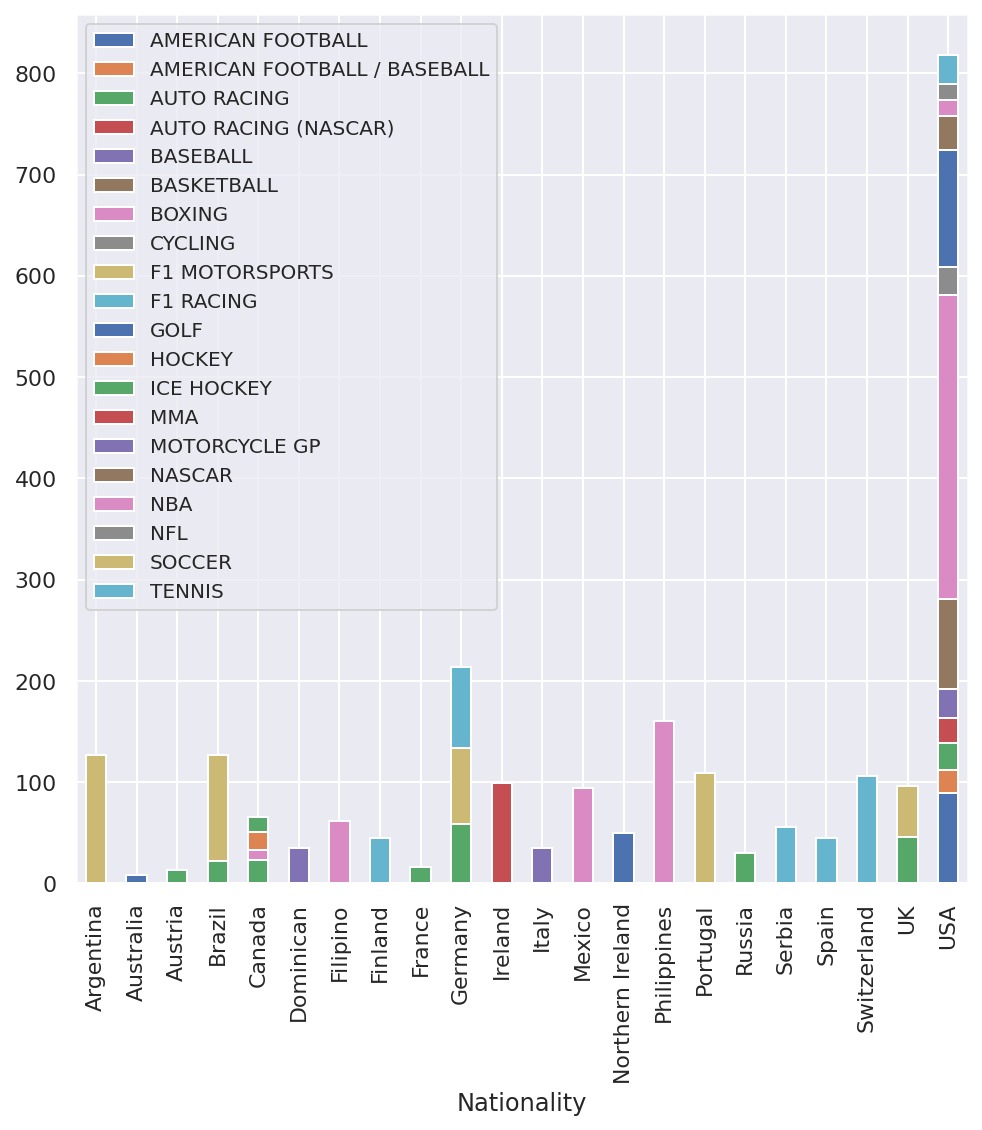

In [ ]:
earn_by_country_max_graph = earn_by_country_max.pivot_table(index=['Nationality'], 
                                                      columns='Sport', values='earnings ($ million)').rename_axis(None, axis = 1)

axes = earn_by_country_max_graph.plot.bar(rot=90, stacked=True, figsize=(8,8)) 
axes.legend(loc=2, fontsize = 10)  

In [ ]:
##Ganancia mínima por deporte y por país
earn_by_country_min = earn_by_country_1.groupby(["Nationality","Sport"]).min()
earn_by_country_min

earnings ($ million)
Nationality      Sport                                             
Argentina        SOCCER                                        32.3
Australia        GOLF                                           8.5
Austria          AUTO RACING                                   13.5
Brazil           AUTO RACING                                   10.0
                 SOCCER                                        31.0
Canada           AUTO RACING                                   20.0
                 BOXING                                        10.2
                 HOCKEY                                        17.9
                 ICE HOCKEY                                    13.5
Dominican        BASEBALL                                      35.0
Filipino         BOXING                                        62.0
Finland          F1 RACING                                     40.0
France           AUTO RACING                                    9.0
Germany          AUTO RACING                                   15.0
                 F1 MOTORSPORTS                                33.0
                 F1 RACING                                     34.0
Ireland          MMA                                           99.0
Italy            MOTORCYCLE GP                                 28.0
Mexico           BOXING                                        94.0
Northern Ireland GOLF                                          50.0
Philippines      BOXING                                        40.0
Portugal         SOCCER                                        38.0
Russia           ICE HOCKEY                                    29.8
Serbia           TENNIS                                        55.8
Spain            TENNIS                                        44.5
Switzerland      TENNIS                                        35.0
UK               AUTO RACING                                    9.0
                 SOCCER                                        28.0
USA              AMERICAN FOOTBALL                             29.0
                 AMERICAN FOOTBALL / BASEBALL                  22.5
                 AUTO RACING                                   26.5
                 AUTO RACING (NASCAR)                          20.0
                 BASEBALL                                      12.7
                 BASKETBALL                                     8.1
                 BOXING                                         8.1
                 CYCLING                                       28.0
                 GOLF                                           8.1
                 NASCAR                                        19.1
                 NBA                                           15.2
                 NFL                                            9.5
                 TENNIS                                         8.5

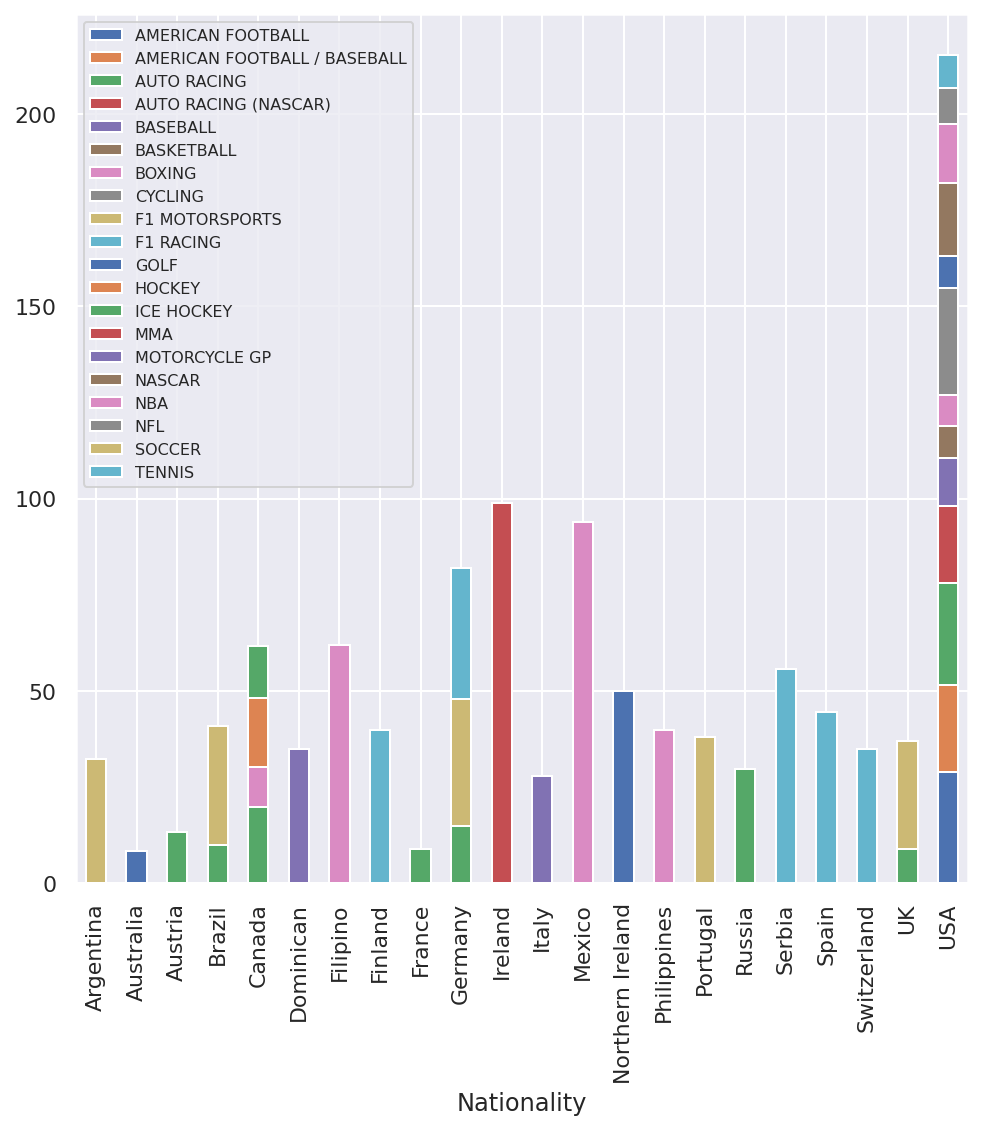

In [ ]:
earn_by_country_min_graph = earn_by_country_min.pivot_table(index=['Nationality'], 
                                                      columns='Sport', values='earnings ($ million)').rename_axis(None, axis = 1)

axes = earn_by_country_min_graph.plot.bar(rot=90, stacked=True, figsize=(8,8)) 
axes.legend(loc=2, fontsize = 8)

---
# 7. Atleta con mayores ganancias por deporte, por década.
---

In [ ]:
##7.Atleta con mayores ganancias por deporte por década
decade_1990 = df1[(df1.index < 2000)] 
decade_2000 = df1[(df1.index >= 2000) & (df1.index < 2010)]
decade_2010 = df1[df1.index >= 2010]

In [ ]:
decade_1990.sort_values(by = "earnings ($ million)", ascending = False).head(1)

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1997,Michael Jordan,USA,1,2,BASKETBALL,78.3


In [ ]:
decade_2000.sort_values(by = "earnings ($ million)", ascending = False).head(1)

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
2008,Tiger Woods,USA,1,1,GOLF,115.0


In [ ]:
decade_2010.sort_values(by = "earnings ($ million)", ascending = False).head(1)

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
2015,Floyd Mayweather,USA,1,1,BOXING,300.0


---
# 8. Ganancia total por cada deporte, por cada año.
---

In [ ]:
##8.Ganancia total por cada deporte por cada año.
earn_per_year = pd.read_csv('/content/earnings_per_sport_per_year.csv')
earn_per_year

,sport,year,earnings
0,American Football,2004,42.0
1,American Football,2005,37.5
2,American Football,2006,29.0
3,American Football,2010,78.2
4,American Football,2012,42.4
...,...,...,...
172,tennis,1995,16.0
173,tennis,2004,28.2
174,tennis,2008,35.0
175,tennis,2010,43.0


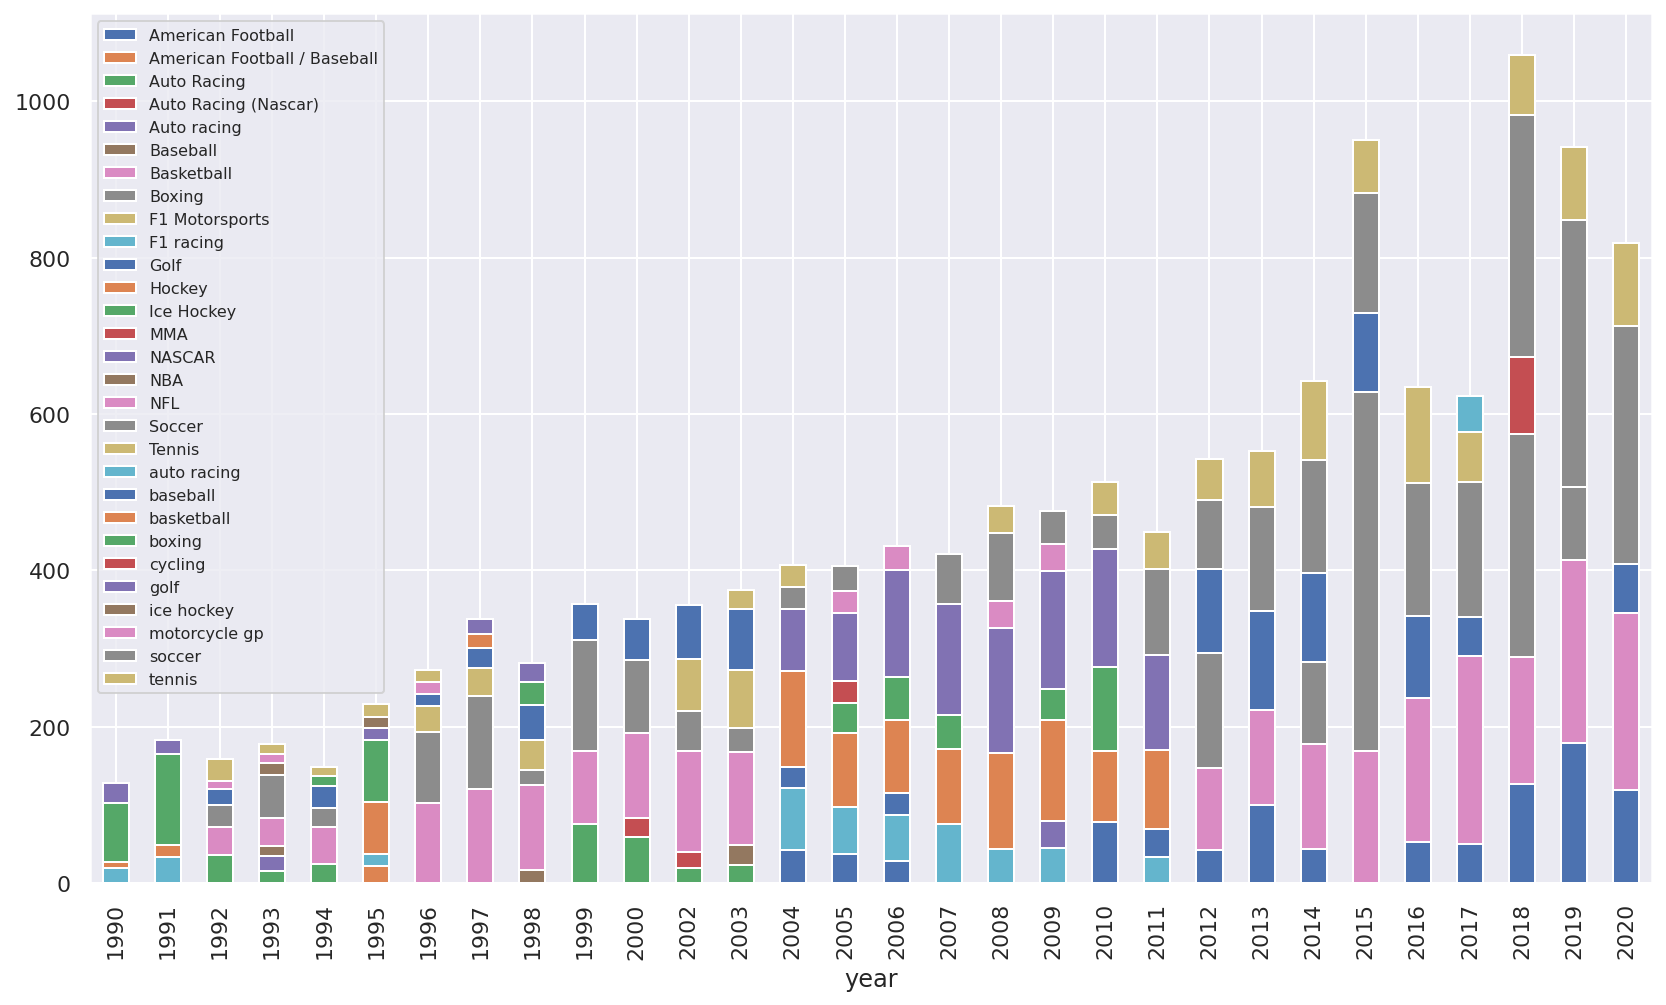

In [ ]:
earn_per_year_graph = earn_per_year.pivot_table(index=['year'], 
                                                      columns='sport', 
                                                values='earnings').rename_axis(None, axis = 1)
axes = earn_per_year_graph.plot.bar(rot=90, stacked=True, figsize=(14,8),legend='upper left') 
axes.legend(loc=2, fontsize = 8)

In [ ]:
#Te muestra los años y como fueron cambiando de rango los deportistas

data_2010_2020 = df1[df1.index >= 2010]
deportistas = list(set(data_2010_2020['Name']))
deportista_sube_dos_lugares=[]


for d in deportistas:
  deportista = data_2010_2020[data_2010_2020['Name']==d]
  rank = deportista['Current Rank']
  if sum(rank[rank > int(rank.head(1))+1]):
    deportista_sube_dos_lugares.append(d)

print(deportista_sube_dos_lugares)

result = pd.DataFrame()
for i in range(0, len(deportista_sube_dos_lugares)):
  result = pd.concat([result, data_2010_2020[data_2010_2020["Name"] == deportista_sube_dos_lugares[i]]])
result.head(50)



['Phil Mickelson', 'Cristiano Ronaldo', 'Tiger Woods', 'Kobe Bryant', 'Kevin Durant', 'David Beckham']


,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
2010,Phil Mickelson,USA,4,6,GOLF,46.0
2011,Phil Mickelson,USA,5,4,GOLF,46.5
2012,Phil Mickelson,USA,7,5,GOLF,47.8
2013,Phil Mickelson,USA,7,7,GOLF,48.7
2014,Phil Mickelson,USA,8,7,GOLF,53.2
2015,Phil Mickelson,USA,8,8,GOLF,50.8
2016,Phil Mickelson,USA,8,8,GOLF,52.9
2011,Cristiano Ronaldo,Portugal,7,13,SOCCER,38.0
2012,Cristiano Ronaldo,Portugal,9,21,SOCCER,42.5


https://cogitovsmachina.github.io/codelabs/el-deportista-mejor-pagado/#0